In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#====================================================================
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd

# Try different encodings such as 'ISO-8859-1', 'latin1', or 'windows-1252'
data = pd.read_csv(r"D:\New Projects\Flood Data.csv", encoding='ISO-8859-1')



In [6]:
data

State      Month  Rainfall (mm)  Temperature (°C)  \
0       Andhra Pradesh    January             85                28   
1    Arunachal Pradesh   February            110                26   
2                Assam      March             95                29   
3                Bihar      April            105                32   
4         Chhattisgarh        May            115                33   
..                 ...        ...            ...               ...   
811      Uttar Pradesh     August            145                32   
812        Uttarakhand  September            105                28   
813        West Bengal    October            115                31   
814         Chandigarh   November            125                33   
815              Delhi   December            140                29   

     Humidity (%)  Wind Speed (km/h)  River Flow (m³/s)  Soil Moisture (%)  \
0              75                 12               1500                 32   
1              78                 10               1800                 35   
2              80                 14               1600                 30   
3              77                 13               1700                 28   
4              76                 16               1750                 34   
..            ...                ...                ...                ...   
811            80                 15               2000                 40   
812            78                 13               1500                 30   
813            80                 14               1600                 32   
814            79                 17               1750                 35   
815            83                 12               1900                 38   

     Predicted Water Level (m)  
0                         10.0  
1                         12.0  
2                         11.2  
3                         11.5  
4                         12.3  
..                         ...  
811                       15.0  
812                       11.5  
813                       12.2  
814                       13.5  
815                       14.7  

[816 rows x 9 columns]

In [7]:
data.isnull().sum()

State                        0
Month                        0
Rainfall (mm)                0
Temperature (°C)             0
Humidity (%)                 0
Wind Speed (km/h)            0
River Flow (m³/s)            0
Soil Moisture (%)            0
Predicted Water Level (m)    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      816 non-null    object 
 1   Month                      816 non-null    object 
 2   Rainfall (mm)              816 non-null    int64  
 3   Temperature (°C)           816 non-null    int64  
 4   Humidity (%)               816 non-null    int64  
 5   Wind Speed (km/h)          816 non-null    int64  
 6   River Flow (m³/s)          816 non-null    int64  
 7   Soil Moisture (%)          816 non-null    int64  
 8   Predicted Water Level (m)  816 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 57.5+ KB


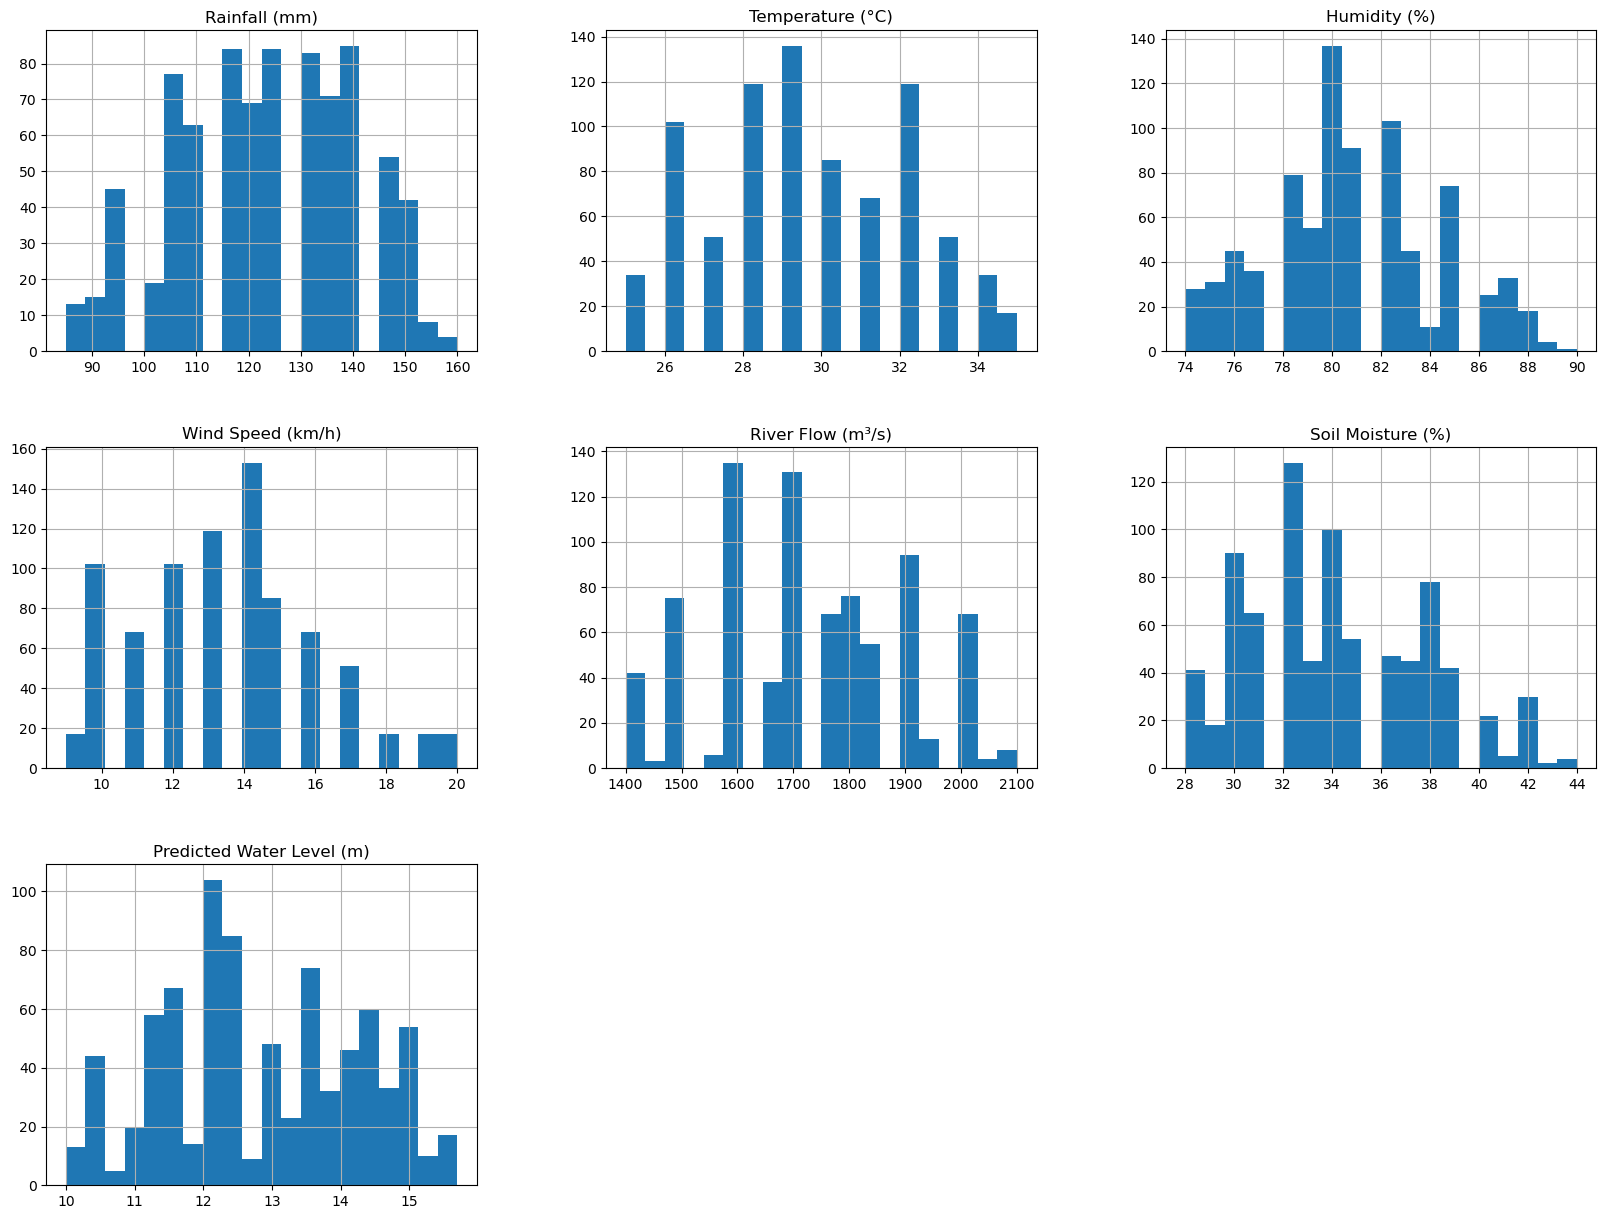

In [8]:
data.hist(bins=20, figsize=(20, 15))
plt.show()

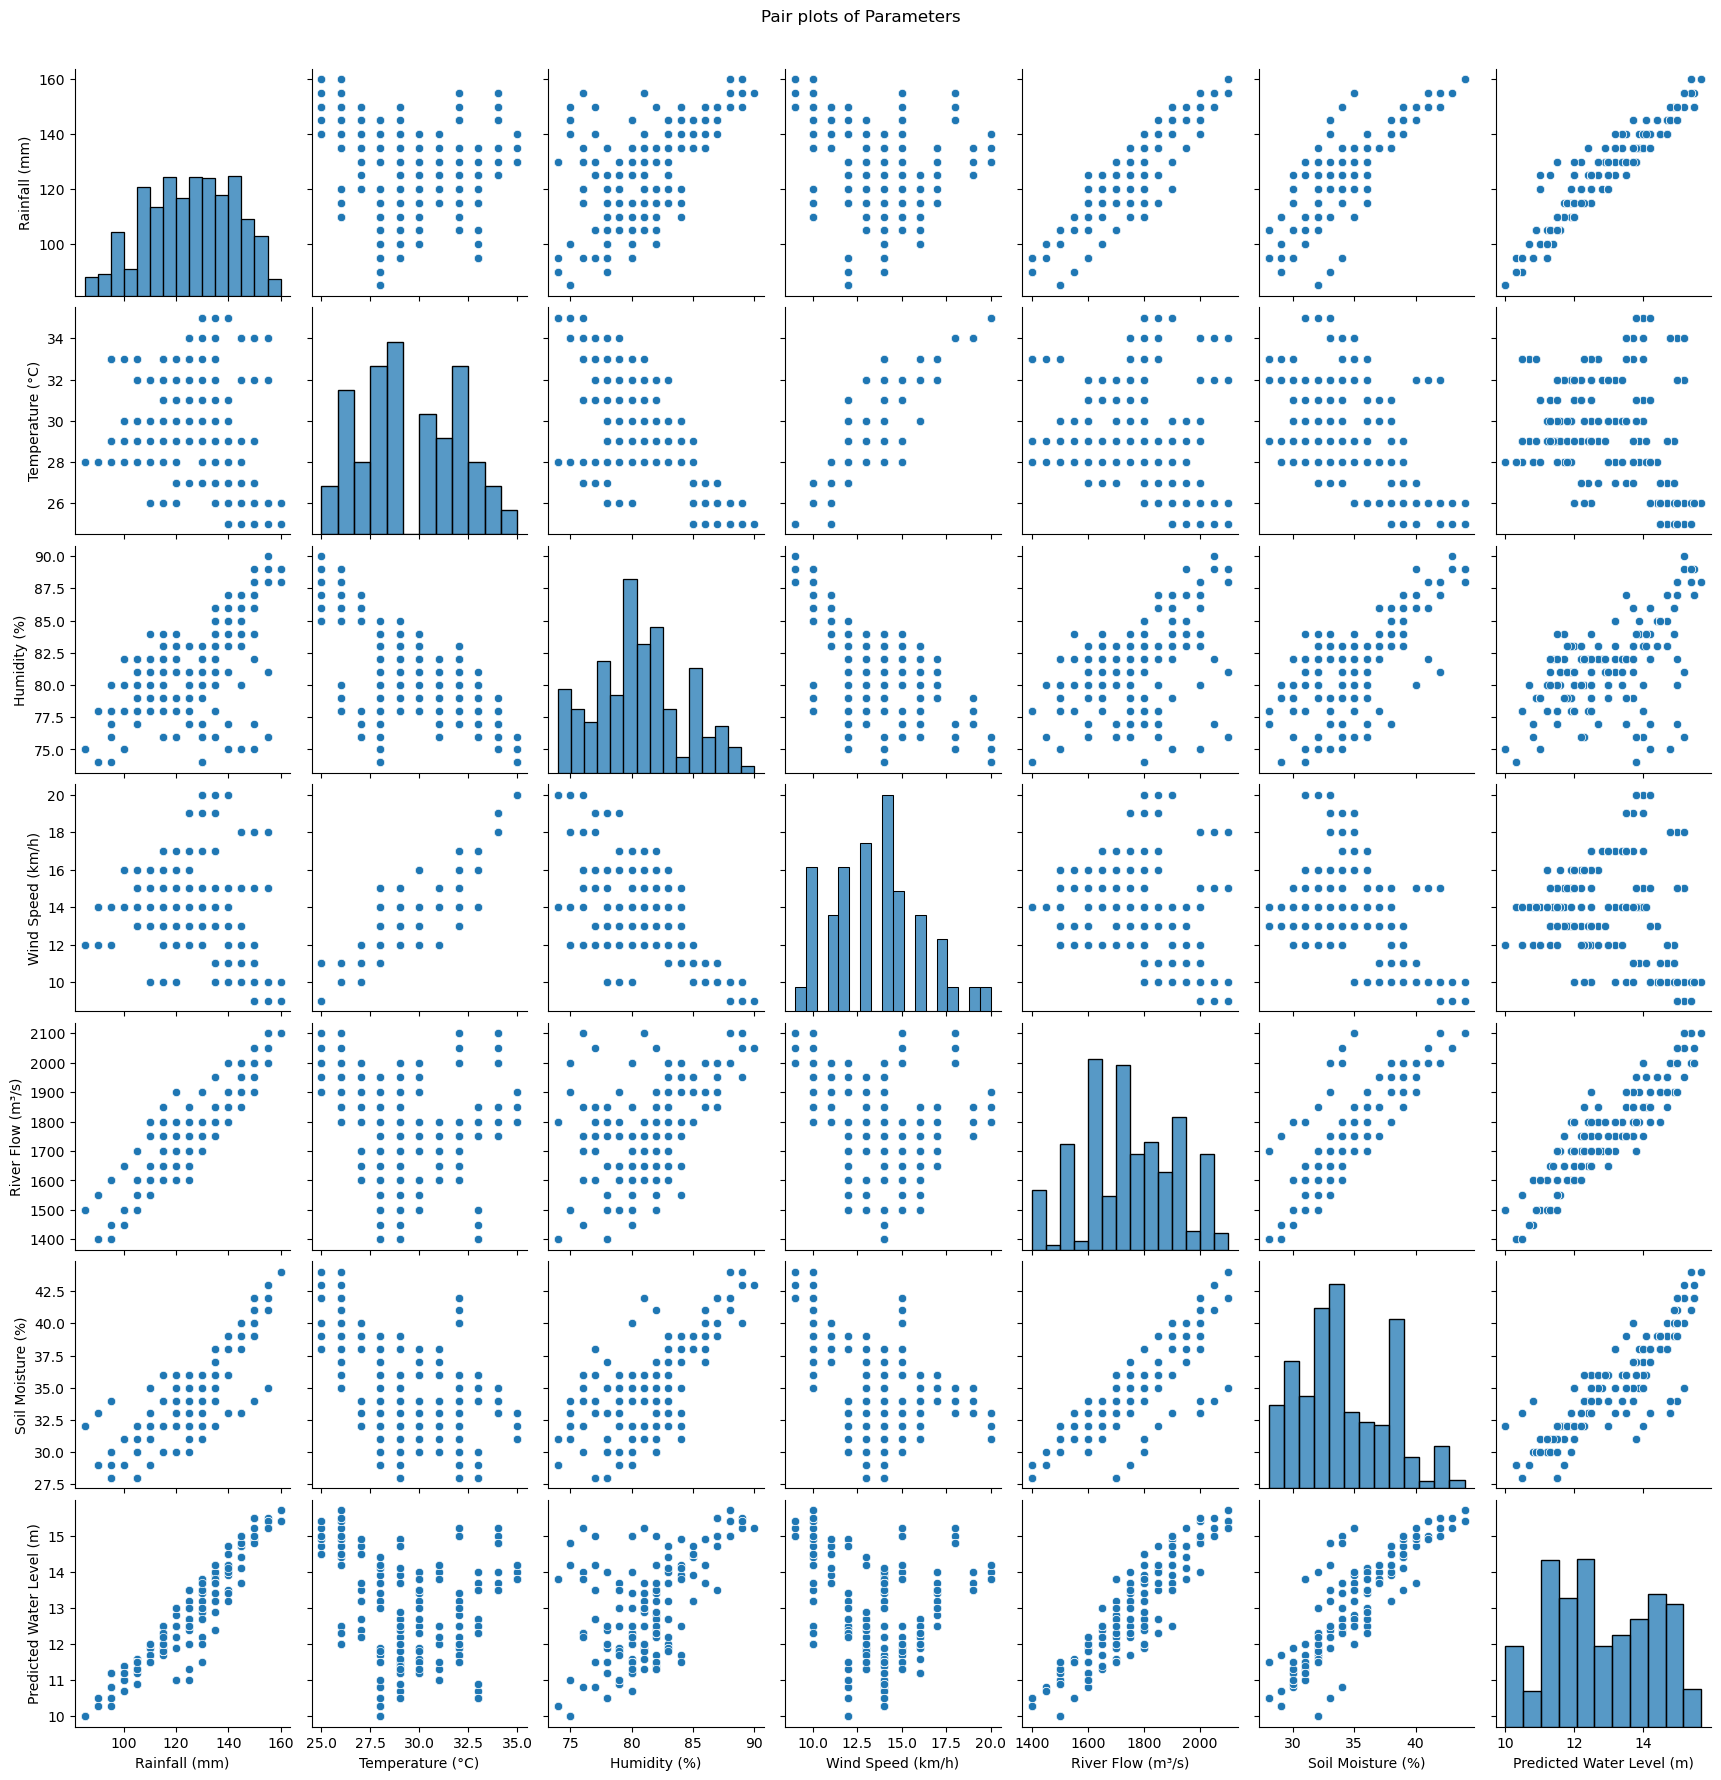

In [9]:
sns.pairplot(data)
plt.suptitle('Pair plots of Parameters', y=1.02)
plt.show()

In [15]:
data["State"].value_counts()


Jharkhand               34
West Bengal             34
Sikkim                  34
Tamil Nadu              34
Telangana               34
Tripura                 34
Maharashtra             34
Uttar Pradesh           34
Uttarakhand             34
Rajasthan               34
Chandigarh              34
Delhi                   34
Punjab                  17
Puducherry              17
Ladakh                  17
Lakshadweep             17
Andaman & Nicobar       17
Dadra & Nagar Haveli    17
Andhra Pradesh          17
Odisha                  17
Arunachal Pradesh       17
Nagaland                17
Mizoram                 17
Meghalaya               17
Manipur                 17
Madhya Pradesh          17
Kerala                  17
Karnataka               17
Himachal Pradesh        17
Haryana                 17
Gujarat                 17
Goa                     17
Chhattisgarh            17
Bihar                   17
Assam                   17
Daman & Diu             17
Name: State, dtype: int64

In [16]:
data["State"]=data["State"].replace(['Jharkhand','West Bengal','Sikkim','Tamil Nadu','Telangana','Tripura','Maharashtra','Uttar Pradesh','Uttarakhand','Rajasthan','Chandigarh','Delhi','Punjab','Puducherry','Ladakh','Lakshadweep','Andaman & Nicobar','Dadra & Nagar Haveli','Andhra Pradesh','Odisha','Arunachal Pradesh','Nagaland','Mizoram','Meghalaya','Manipur','Madhya Pradesh','Kerala','Karnataka','Himachal Pradesh','Haryana','Gujarat','Goa','Chhattisgarh','Bihar','Assam','Daman & Diu'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

In [17]:
data

State      Month  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0       19    January             85                28            75   
1       21   February            110                26            78   
2       35      March             95                29            80   
3       34      April            105                32            77   
4       33        May            115                33            76   
..     ...        ...            ...               ...           ...   
811      8     August            145                32            80   
812      9  September            105                28            78   
813      2    October            115                31            80   
814     11   November            125                33            79   
815     12   December            140                29            83   

     Wind Speed (km/h)  River Flow (m³/s)  Soil Moisture (%)  \
0                   12               1500                 32   
1                   10               1800                 35   
2                   14               1600                 30   
3                   13               1700                 28   
4                   16               1750                 34   
..                 ...                ...                ...   
811                 15               2000                 40   
812                 13               1500                 30   
813                 14               1600                 32   
814                 17               1750                 35   
815                 12               1900                 38   

     Predicted Water Level (m)  
0                         10.0  
1                         12.0  
2                         11.2  
3                         11.5  
4                         12.3  
..                         ...  
811                       15.0  
812                       11.5  
813                       12.2  
814                       13.5  
815                       14.7  

[816 rows x 9 columns]

In [18]:
data["Month"].value_counts()

January      68
February     68
March        68
April        68
May          68
June         68
July         68
August       68
September    68
October      68
November     68
December     68
Name: Month, dtype: int64

In [19]:
data["Month"]=data["Month"].replace(['January','February','March','April','May','June','July','August','September','October','November','December'],[1,2,3,4,5,6,7,8,9,10,11,12])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      816 non-null    int64  
 1   Month                      816 non-null    int64  
 2   Rainfall (mm)              816 non-null    int64  
 3   Temperature (°C)           816 non-null    int64  
 4   Humidity (%)               816 non-null    int64  
 5   Wind Speed (km/h)          816 non-null    int64  
 6   River Flow (m³/s)          816 non-null    int64  
 7   Soil Moisture (%)          816 non-null    int64  
 8   Predicted Water Level (m)  816 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 57.5 KB


In [22]:
data

State  Month  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0       19      1             85                28            75   
1       21      2            110                26            78   
2       35      3             95                29            80   
3       34      4            105                32            77   
4       33      5            115                33            76   
..     ...    ...            ...               ...           ...   
811      8      8            145                32            80   
812      9      9            105                28            78   
813      2     10            115                31            80   
814     11     11            125                33            79   
815     12     12            140                29            83   

     Wind Speed (km/h)  River Flow (m³/s)  Soil Moisture (%)  \
0                   12               1500                 32   
1                   10               1800                 35   
2                   14               1600                 30   
3                   13               1700                 28   
4                   16               1750                 34   
..                 ...                ...                ...   
811                 15               2000                 40   
812                 13               1500                 30   
813                 14               1600                 32   
814                 17               1750                 35   
815                 12               1900                 38   

     Predicted Water Level (m)  
0                         10.0  
1                         12.0  
2                         11.2  
3                         11.5  
4                         12.3  
..                         ...  
811                       15.0  
812                       11.5  
813                       12.2  
814                       13.5  
815                       14.7  

[816 rows x 9 columns]

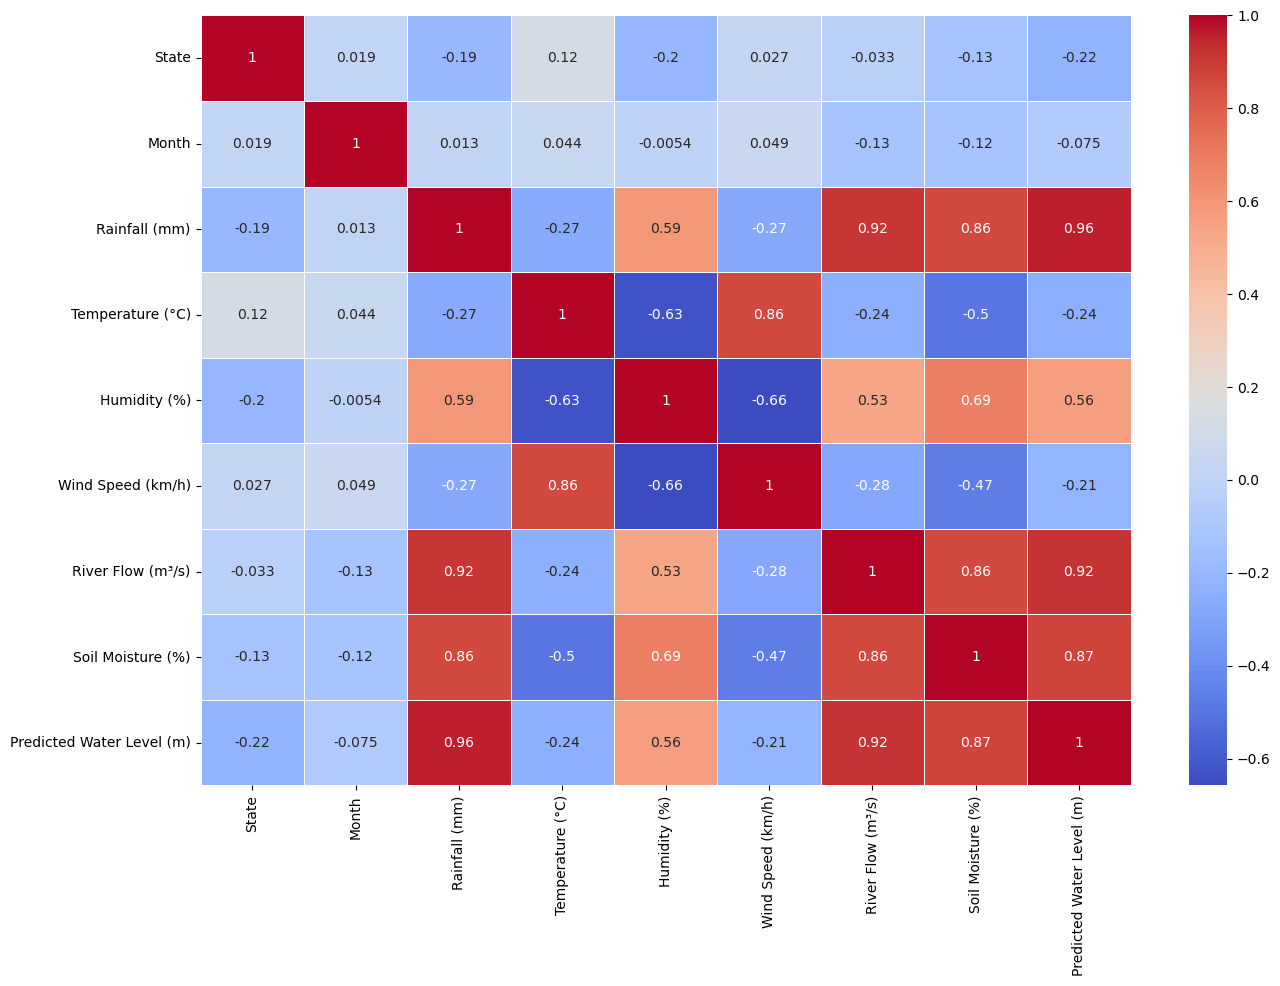

In [23]:

corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [28]:
import pandas as pd

# Example: Binning continuous values into 3 categories
y_train_categorical = pd.cut(y_train, bins=[-float('inf'), 0.33, 0.66, float('inf')], labels=[0, 1, 2])

print(y_train_categorical.head())


691    2
450    2
379    2
769    2
741    2
Name: Predicted Water Level (m), dtype: category
Categories (3, int64): [0 < 1 < 2]


In [40]:
data['Predicted Water Level (m)'] = data['Predicted Water Level (m)'].astype('int64')


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   State                      816 non-null    int64
 1   Month                      816 non-null    int64
 2   Rainfall (mm)              816 non-null    int64
 3   Temperature (°C)           816 non-null    int64
 4   Humidity (%)               816 non-null    int64
 5   Wind Speed (km/h)          816 non-null    int64
 6   River Flow (m³/s)          816 non-null    int64
 7   Soil Moisture (%)          816 non-null    int64
 8   Predicted Water Level (m)  816 non-null    int64
dtypes: int64(9)
memory usage: 57.5 KB


In [42]:
X = data.drop("Predicted Water Level (m)", axis = 1)
y = data["Predicted Water Level (m)"]

In [43]:
X

State  Month  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0       19      1             85                28            75   
1       21      2            110                26            78   
2       35      3             95                29            80   
3       34      4            105                32            77   
4       33      5            115                33            76   
..     ...    ...            ...               ...           ...   
811      8      8            145                32            80   
812      9      9            105                28            78   
813      2     10            115                31            80   
814     11     11            125                33            79   
815     12     12            140                29            83   

     Wind Speed (km/h)  River Flow (m³/s)  Soil Moisture (%)  
0                   12               1500                 32  
1                   10               1800                 35  
2                   14               1600                 30  
3                   13               1700                 28  
4                   16               1750                 34  
..                 ...                ...                ...  
811                 15               2000                 40  
812                 13               1500                 30  
813                 14               1600                 32  
814                 17               1750                 35  
815                 12               1900                 38  

[816 rows x 8 columns]

In [44]:
y

0      10
1      12
2      11
3      11
4      12
       ..
811    15
812    11
813    12
814    13
815    14
Name: Predicted Water Level (m), Length: 816, dtype: int64

In [45]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=135)

# Instantiate and train the Logistic Regression model
classimodel = LogisticRegression()  
classimodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = classimodel.score(X_train, y_train)
testscore = classimodel.score(X_test, y_test)

# Make predictions
y_pred = classimodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.7000680549039515
Confusion matrix:
[[11  4  0  0  0  0]
 [ 0 27  7  1  0  0]
 [ 0  6 41  6  2  0]
 [ 0  0 15 26  7  0]
 [ 0  0  0  2 27  7]
 [ 0  0  0  0  4 11]]


In [46]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Instantiate and train the RandomForest model
RFmodel = RandomForestClassifier()  
RFmodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = RFmodel.score(X_train, y_train)
testscore = RFmodel.score(X_test, y_test)

# Make predictions
y_pred = RFmodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.9951023010490928
Confusion matrix:
[[19  0  0  0  0  0]
 [ 0 40  0  0  0  0]
 [ 0  0 53  0  0  0]
 [ 0  0  0 40  1  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 16]]


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Instantiate and train the SVM model
SVMmodel = SVC()  # You can specify kernel='linear', 'poly', 'rbf', etc., if needed
SVMmodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = SVMmodel.score(X_train, y_train)
testscore = SVMmodel.score(X_test, y_test)

# Make predictions
y_pred = SVMmodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.474566649697189
Confusion matrix:
[[ 0 19  0  0  0  0]
 [ 0 13 26  1  0  0]
 [ 0  0 43  9  1  0]
 [ 0  0 12 22  7  0]
 [ 0  0  0  3 32  0]
 [ 0  0  0  0 16  0]]


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Instantiate and train the GaussianNB model
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = NBmodel.score(X_train, y_train)
testscore = NBmodel.score(X_test, y_test)

# Make predictions
y_pred = NBmodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.7698522614285984
Confusion matrix:
[[17  2  0  0  0  0]
 [ 0 33  7  0  0  0]
 [ 0  4 42  7  0  0]
 [ 0  0  6 26  9  0]
 [ 0  0  0  8 24  3]
 [ 0  0  0  0  1 15]]


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Instantiate and train the DecisionTreeClassifier model
DTmodel = DecisionTreeClassifier(random_state=110)  # You can specify other parameters if needed
DTmodel.fit(X_train, y_train)

# Get the accuracy scores
trainscore = DTmodel.score(X_train, y_train)
testscore = DTmodel.score(X_test, y_test)

# Make predictions
y_pred = DTmodel.predict(X_test)

# Calculate the F1 score
f1score = f1_score(y_test, y_pred, average='weighted')  # Choose appropriate average

# Print the F1 score and confusion matrix
print('F1 score:', f1score)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


F1 score: 0.9901309566211636
Confusion matrix:
[[19  0  0  0  0  0]
 [ 0 40  0  0  0  0]
 [ 0  0 53  0  0  0]
 [ 0  0  1 39  1  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 16]]


In [51]:
X_test

State  Month  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
371     36     12            115                31            80   
534     31      7            145                34            75   
500     10      9            130                35            74   
462     14      7            105                29            80   
92       9      9            110                28            80   
..     ...    ...            ...               ...           ...   
682     28     11             90                28            74   
136      4      5            140                29            83   
478     11     11            125                33            79   
655     15      8            120                27            76   
365     12      6             95                33            78   

     Wind Speed (km/h)  River Flow (m³/s)  Soil Moisture (%)  
371                 15               1600                 32  
534                 18               2000                 33  
500                 20               1800                 31  
462                 15               1500                 30  
92                  13               1550                 31  
..                 ...                ...                ...  
682                 14               1400                 29  
136                 14               1850                 36  
478                 17               1750                 35  
655                 12               1600                 32  
365                 14               1400                 28  

[204 rows x 8 columns]

In [53]:
y_test

371    12
534    14
500    13
462    11
92     11
       ..
682    10
136    14
478    13
655    12
365    10
Name: Predicted Water Level (m), Length: 204, dtype: int64

In [50]:
import joblib

# Save the model to a file with a .pkl extension
joblib.dump(RFmodel, 'flood.pkl')

['flood.pkl']

In [52]:
joblib.load('flood.pkl')

input=[[36,12,115,31,80,15,1600,32]]

pred=RFmodel.predict(input)

print(pred)

[12]
